## My Attempt at finding values for $A_r$

Conclusion: Harry's are better

In [11]:
import numpy as np

# Constants
delta = 4.669201609102990  
# Known initial values
A_values = [2, 1 + np.sqrt(5)]  # Initial terms: A_0, A_1

# Function to calculate A_r values for given r values
def calculate_A_r(num_terms):
    for r in range(2, num_terms):  # Start from the 3rd term
        A_next = A_values[-1] + 1 / (delta ** (r - 1))
        A_values.append(A_next)
    return A_values

# Calculate A_r values up to a desired number of terms
num_terms = 20
A_r_values = calculate_A_r(num_terms)

# Display the results
for r, A_r in enumerate(A_r_values):
    print(f"A_{r} = {A_r}")

A_0 = 2
A_1 = 3.23606797749979
A_2 = 3.450237354562116
A_3 = 3.496105876633381
A_4 = 3.5059295094321534
A_5 = 3.5080334307491556
A_6 = 3.508484026267006
A_7 = 3.5085805300283712
A_8 = 3.5086011981788268
A_9 = 3.5086056246637347
A_10 = 3.50860657268125
A_11 = 3.5086067757175705
A_12 = 3.508606819201733
A_13 = 3.508606828514709
A_14 = 3.5086068305092635
A_15 = 3.508606830936436
A_16 = 3.5086068310279233
A_17 = 3.508606831047517
A_18 = 3.508606831051713
A_19 = 3.508606831052612


## Attempt at an algorithm to produce the iterantions of the function

It works apart from loop where my coding inability is having index problems 

In [7]:
#Harry's list of A values
A_List = [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
          3.5666663858959753, 3.569243282100676, 3.569795227423478,
          3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
          3.5699453551991143]
alpha = 2.5029
# Defining the x values for plotting
x_vals = np.linspace(-0.5, 0.5, 500)

# Setting g_0
def g_0(A,x):
    g_vals = A * (1/4 - x**2)
    return g_vals

# Function for recursive expression for g_r
def g_many(x ,A):
    #A values 
    A_array = A
    #alpha
    alpha = 2.5029
    #r interation counter
    r_i = len(A)
    print(r_i)
    r = [1,2,3,4,5]
    #g_value array
    g_values = []
    #g_i = (-alpha)^i * g_0(A_array[i],x/(-alpha))
    g_start = g_0(A_array[0],x)
    g_values.append(g_start)
    r = [1,2]
    for i in r:   #for every r value
        for j in range(1,r[i]):   #iterate loop amount of times corresponding to r value
            F_j = g_0(A_array[j],x/(-alpha))
            F_new = g_0(A_array[j],F_j/(-alpha))
    
        g_new = ((-alpha)**r[i-1]) * (F_new)
    g_values.append(g_new)

    plt.plot(x,g_values[0], label = "g_0")
    plt.plot(x,g_values[1], label = "g_1")
    plt.legend()

g_many(x_vals,A_List)

11


IndexError: list index out of range

## Brute Force Graphing Method

First 3 expressions for $g_{1r}$, given $r \in \{0,1\}$, dervived via brute force expansion for $r=2,3$ such that $g_{1,2}=(-\alpha)^2*F(A_3,F(A_3, F(A_3, F(A_3,\frac{x}{(-\alpha)^2}))))$ and $g_{1,3}=(-\alpha)^3*F(A_4, F(A_4, F(A_4,F(A_4, F(A_4, F(A_4,\frac{x}{(-\alpha)^3}))))$ where $F_0(A_{1},\frac{x}{(-\alpha)^0}) = (-\alpha)^0A_1*(\frac{1}{4}-(\frac{x}{(-\alpha)})^2)$

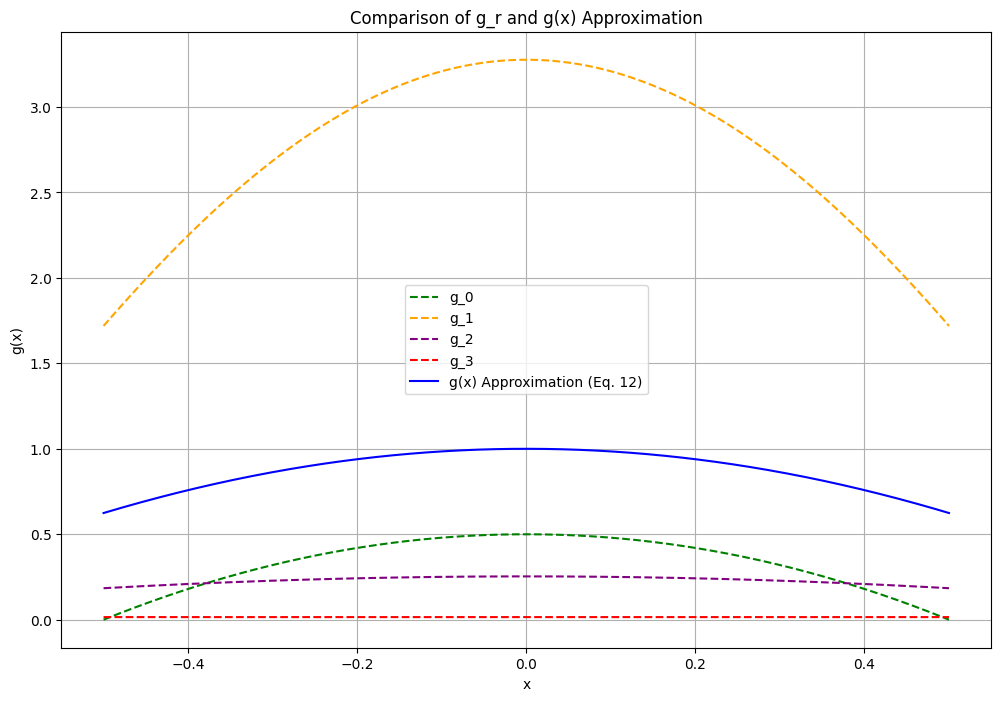

In [9]:
import matplotlib.pyplot as plt
# Provided A_List values
A_List = [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
          3.5666663858959753, 3.569243282100676, 3.569795227423478,
          3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
          3.5699453551991143]
alpha = 2.5029
# Define x values for plotting
x_vals = np.linspace(-0.5, 0.5, 500)

# Equation (12) approximation for g(x)
def g_approximation(x):
    return 1 - 1.52763 * x**2 + 0.10482 * x**4 - 0.02671 * x**6

# Compute g_r for r in {0,1,2,3} via brute force
def g_0(x):
    A1 = A_List[0]
    return A1 * (1/4 - x**2)

def g_1(x):
    A2 = A_List[1]
    return alpha * A2 * (
        (1/4) * (1/4 * A2**2 - 1) - (1/2) * (A2**2 * x**2 / alpha**2) + (A2**2 * x**4 / alpha**4))

def g_2(x):
    A3 = A_List[2]
    return (-alpha)**2 * A3 * (
        (1/4) * (1/4 * A3**2 - 1) - (1/2) * (A3**2 * (A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A3**2 * ((A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4))

def g_3(x):
    A4 = A_List[3]
    return (-alpha)**3 * A4 * (
        (1/4) * (1/4 * A4**2 - 1) - (1/2) * (A4**2 * (A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A4**2 * ((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4))

# Latex for g_r
import sympy as sym
from IPython.display import display_latex
x = sym.symbols('x')
A0 = sym.symbols('A0')
A1 = sym.symbols('A1')
A2 = sym.symbols('A2')
A3 = sym.symbols('A3')
A4 = sym.symbols('A4')
alpha = sym.symbols('alpha')


# Show latex for brute force terms
display_latex(A1 * (1/4 - x**2))
display_latex(alpha * A2 * ((1/4) * (1/4 * A2**2 - 1) - (1/2) * (A2**2 * x**2 / alpha**2) + (A2**2 * x**4 / alpha**4)))
display_latex((-alpha)**2 * A3 * ((1/4) * (1/4 * A3**2 - 1) - (1/2) * (A3**2 * (A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A3**2 * ((A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4)))
display_latex((-alpha)**3 * A4 * ((1/4) * (1/4 * A4**2 - 1) - (1/2) * (A4**2 * (A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A4**2 * ((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4)))

alpha = 2.5029
# Plot g_0, g_1, g_2, g_3 and the approximation
plt.figure(figsize=(12, 8))
x_vals = np.linspace(-0.5, 0.5, 500)

# Plotting g_0 to g_3
plt.plot(x_vals, g_0(x_vals), label='g_0', linestyle='--', color='green')
plt.plot(x_vals, g_1(x_vals), label='g_1', linestyle='--', color='orange')
plt.plot(x_vals, g_2(x_vals), label='g_2', linestyle='--', color='purple')
plt.plot(x_vals, g_3(x_vals), label='g_3', linestyle='--', color='red')

# Plot the approximation for g(x)
plt.plot(x_vals, g_approximation(x_vals), label='g(x) Approximation (Eq. 12)', color='blue')

plt.title('Comparison of g_r and g(x) Approximation')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()